In [1]:
using Plots
using LinearAlgebra
using Statistics
include("./ffnnModule.jl")
using .basicNeuralNetwork


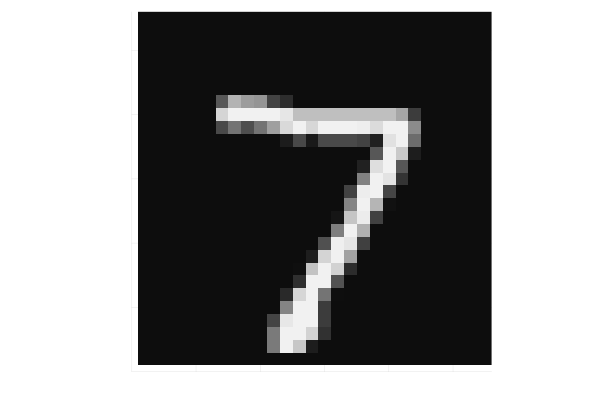

In [3]:
plot_ubyte_image("./mnist/t10k-images.idx3-ubyte", 1)

# Experimental pass

*only for checking basic functionalities*

In [2]:
input = Vector{Float64}([1.0,1.1,2.1,0.2,0,0])
label = Vector{Float64}([1,0])
input2 = Vector{Float64}([0,0,1.4,1.2,0,0])
label2 = Vector{Float64}([1,0])

layer1 = DenseLayer(6, 4, relu, relu_derivative)
layer2 = DenseLayer(4, 3, relu, relu_derivative)
layer3 = DenseLayer(3, 2, softmax, softmax_derivative)

layers = Vector([layer1,layer2,layer3])

#relu isn't fit for such small networks, also not in every single layer.

network = NeuralNetwork(layer1,layer2,layer3)

NeuralNetwork(DenseLayer[DenseLayer([-0.6357887187220689 0.11900905145728102 … -0.5654871207568953 -0.764300022579093; -0.6775911448845019 0.17738295921154482 … -0.8916716788878984 -0.48373821164247416; 1.0425868414558457 0.7455787082211159 … -0.19309074274829008 -0.26442941964739575; -0.19757912566726718 -0.32892861104621696 … -1.4377867529895163 -0.3475846450138912], [0.0, 0.0, 0.0, 0.0], Main.basicNeuralNetwork.relu, Main.basicNeuralNetwork.relu_derivative), DenseLayer([-1.1058489893819965 0.2714087881395605 1.0772906056276939 0.4870630071489658; -0.028707518309802203 -0.5991814077190173 -0.19794452561417625 -0.6892749687660261; -1.4213124224046307 0.6154599883463273 1.7669774731686505 -1.2151448502564182], [0.0, 0.0, 0.0], Main.basicNeuralNetwork.relu, Main.basicNeuralNetwork.relu_derivative), DenseLayer([0.4955804816778636 0.0538893659331109 -0.5461305736238291; 0.6354608801602467 -1.1372109212503216 0.186479901930068], [0.0, 0.0], Main.basicNeuralNetwork.softmax, Main.basicNeural

In [3]:
println("input: $input")
output = forward_pass(network, input)
for a in network.activations
    println(a)
end
println(output)


input: [1.0, 1.1, 2.1, 0.2, 0.0, 0.0]


[1.0, 1.1, 2.1, 0.2, 0.0, 0.0]
[1.898995934681336, 0.0, 2.4664988510686903, 1.2924050050825584]
[1.18661597406981, 0.0, 0.08872210900456734]
[0.44250961543291845, 0.5574903845670816]


In [4]:
network.activations

3-element Vector{Vector{Float64}}:
 [1.0, 1.1, 2.1, 0.2, 0.0, 0.0]
 [1.898995934681336, 0.0, 2.4664988510686903, 1.2924050050825584]
 [1.18661597406981, 0.0, 0.08872210900456734]

In [5]:
println("$output\n$label")
#cost function interface
sq = SquareCost()
cost_before = cost(sq, output, label)
println("\tcost before: $cost_before")
costs = []
for i in 1:100
    output = forward_pass(network, input)
    gradients = backpropagation_pass(network, output, label, sq)
    changing_weights(network, gradients, Float64(0.0001))
    push!(costs, cost(sq,output,label))
end
cost_after = cost(sq, output, label)
println("\tcost after: $cost_after")
println("$output")
#gradients and weights have different sizes, idk why. All gradients are square matrices, which is completely wrong
# I suppose I am treating delta_l with a_l instead of a_l-1, so I ought to include a_1=input

[0.44250961543291845, 0.5574903845670816]
[1.0, 0.0]


	cost before: 0.621591057769505


	cost after: 0.5789728769553958
[0.4619605604812061, 0.5380394395187938]


[0.4619605604812061, 0.5380394395187938]
[1.0, 0.0]


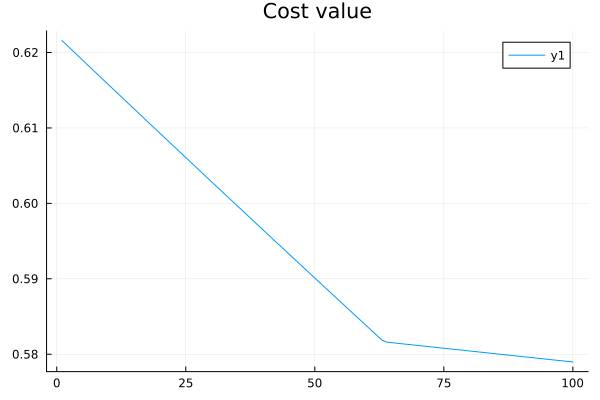

In [9]:
println("$output\n$label")
plot(costs, title="Cost value")


# MNIST training

*propper training on MNIST dataset, though slow with used code*

In [10]:

num_of_epochs = 1
learning_rate = Float64(0.005)
images = read_ubyte_images("./mnist/train-images.idx3-ubyte")
labels = read_mnist_labels("./mnist/train-labels.idx1-ubyte")
image_batches, label_batches = create_batches_with_labels(images, labels, 50)

sq = SquareCost()

layer1 = DenseLayer(784, 256, relu, relu_derivative)
layer2 = DenseLayer(256, 128, relu, relu_derivative)
layer3 = DenseLayer(128, 10, softmax, softmax_derivative)

network = NeuralNetwork(layer1,layer2,layer3)

NeuralNetwork(DenseLayer[DenseLayer([-0.05975628891794078 0.016492373428115766 … -0.03720086234997192 -0.07517492434203708; -0.03425854781096377 -0.07864508671929536 … -0.005916287864188521 -0.0940873343201577; … ; -0.0062823319376877325 0.01888521928702761 … 0.013867324003959144 -0.09219478287645842; -0.040483653186819596 0.024934011946325437 … -0.046704805872256824 0.02092411231256495], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Main.basicNeuralNetwork.relu, Main.basicNeuralNetwork.relu_derivative), DenseLayer([-0.11234986178417358 0.028736004508936434 … 0.004250579635786816 0.046567342709060135; 0.016946363080151773 -0.14467349423578074 … 0.0907189534404156 -0.12906376167798986; … ; -0.11542768335845732 0.028211093889999442 … 0.0652062644670413 -0.04641251151336299; 0.15625463137985615 -0.008071404641746315 … -0.022934806103155007 0.03289608340217959], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0

In [18]:
#training

costs = []
outputs = []
output = false


for i in 1:num_of_epochs
    iteration_number = 0
    for (image_batch, label_batch) in zip(image_batches, label_batches)
        print("iteration $iteration_number\t")
        costs_temp = []
        batch_gradients = []
        for j in 1:size(image_batch,2)
            image = image_batch[:,j]
            label = label_batch[:,j]
            output = forward_pass(network, image)
            gradients = backpropagation_pass(network, output, label, sq)
            push!(outputs, output)
            push!(costs_temp, cost(sq,output,label))
            push!(batch_gradients, gradients)
        end
        
        #this should be a externally defined function
        mean_gradient = batch_gradients[1]
        for grad in batch_gradients
            mean_gradient .+= grad
        end
        mean_gradient .-= batch_gradients[1]
        mean_gradient ./= size(image_batch,2)

        changing_weights(network, mean_gradient, learning_rate)
        push!(costs,mean(costs_temp))
        iteration_number += 1
        if iteration_number==40 #useful only for debugging, shortens time needed
            break
        end
    end
end

iteration 0	iteration 1	

iteration 2	iteration 3	

iteration 4	iteration 5	

iteration 6	iteration 7	

iteration 8	iteration 9	

iteration 10	iteration 11	

iteration 12	iteration 13	

iteration 14	iteration 15	

iteration 16	iteration 17	

iteration 18	iteration 19	

iteration 20	iteration 21	

iteration 22	iteration 23	

iteration 24	iteration 25	

iteration 26	iteration 27	

iteration 28	iteration 29	

iteration 30	iteration 31	

iteration 32	iteration 33	

iteration 34	iteration 35	

iteration 36	iteration 37	

iteration 38	iteration 39	

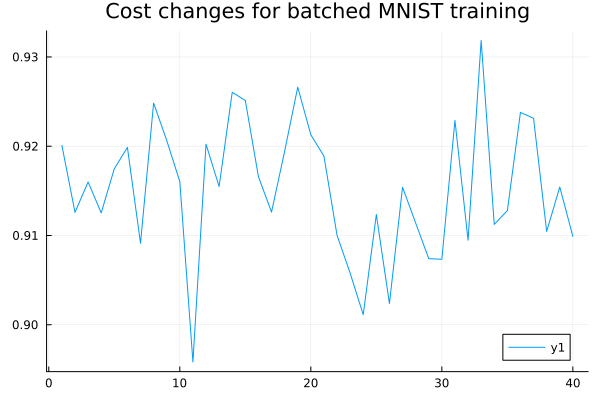

In [19]:
plot(costs,title="Cost changes for batched MNIST training")